In [1]:
import pandas as pd
from datetime import datetime




In [4]:
# Load stock data
stock_df = pd.read_csv('../clean_datasets/merged_stocks_with_indicators.csv', parse_dates=['Date'])

# Load news data
news_df = pd.read_csv('../clean_datasets/cleaned_news_data.csv', parse_dates=['date'])

In [5]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock,daily_return,SMA_20,SMA_50,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL,NaN,NaN,NaN,0.128348,0.128348,0.000000,0.000000,0.000000,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL,-0.052171,NaN,NaN,0.127318,0.127852,-0.000534,-0.000107,-0.000427,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL,-0.073398,NaN,NaN,0.125072,0.126731,-0.001659,-0.000417,-0.001242,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL,0.024751,NaN,NaN,0.123602,0.125900,-0.002299,-0.000793,-0.001505,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL,0.028992,NaN,NaN,0.122873,0.125379,-0.002506,-0.001136,-0.001370,NaN


In [10]:
news_df.head()

,Date,headline,publisher,stock,Sentiment,Label
0,2020-06-05,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,A,0.000,neutral
1,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,A,0.000,neutral
2,2020-05-26,71 Biggest Movers From Friday,Lisa Levin,A,0.000,neutral
3,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,A,0.000,neutral
4,2020-05-22,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,A,0.296,positive


In [7]:
news_df.rename(columns={'date': 'Date'}, inplace=True)

In [9]:


# Normalize date format
news_df['Date'] = news_df['Date'].dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

In [12]:
daily_sentiment = news_df.groupby('Date')['Sentiment'].mean().reset_index()
daily_sentiment.columns = ['Date', 'avg_sentiment']

daily_sentiment

,Date,avg_sentiment
0,2009-02-14,0.226300
1,2009-04-27,0.000000
2,2009-04-29,0.000000
3,2009-05-22,0.000000
4,2009-05-27,0.751050
...,...,...
3950,2020-06-07,0.040156
3951,2020-06-08,0.250061
3952,2020-06-09,0.283041
3953,2020-06-10,0.044075


<Axes: title={'center': 'Average Daily Sentiment'}, xlabel='Date'>

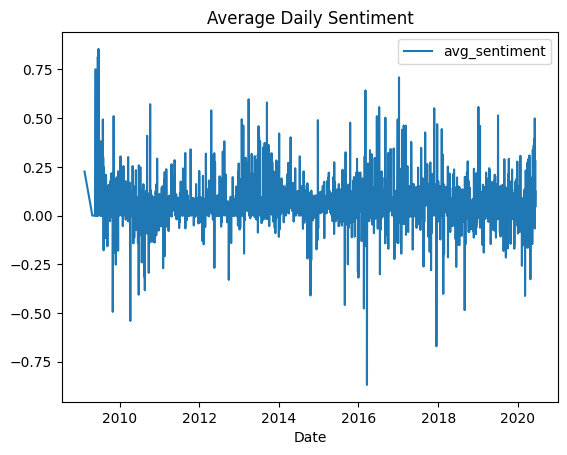

In [13]:
daily_sentiment.plot(x='Date', y='avg_sentiment', kind='line', title='Average Daily Sentiment')

<Axes: title={'center': 'Daily Returns of Stocks'}>

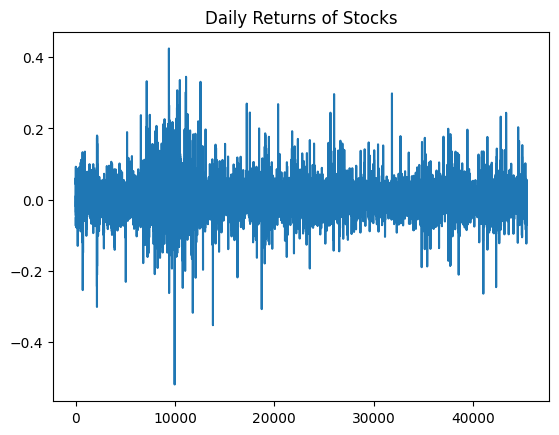

In [16]:
stock_df.sort_values(by=['stock', 'Date'], inplace=True)
stock_df['daily_return'] = stock_df.groupby('stock')['Close'].pct_change()

stock_df['daily_return'].plot(kind='line', title='Daily Returns of Stocks')


In [17]:
merged_df = pd.merge(stock_df, daily_sentiment, on='Date', how='inner')


In [18]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock,daily_return,SMA_20,SMA_50,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,avg_sentiment
0,2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,AAPL,0.006699,8.304378,7.469731,8.311787,7.939465,0.372322,0.249038,0.123284,47.592804,0.000000
1,2009-04-29,4.458929,4.530357,4.422500,4.469286,3.774201,458110800,0.0,0.0,AAPL,0.010008,7.265516,7.656145,7.208044,7.436554,-0.228510,-0.015195,-0.213315,47.932570,0.000000
2,2009-05-22,4.430357,4.435000,4.348214,4.375000,3.694580,297998400,0.0,0.0,AAPL,-0.013529,7.697966,7.671555,7.229077,7.561848,-0.332771,-0.014428,-0.318343,47.987289,0.000000
3,2009-05-27,4.706429,4.820714,4.675357,4.751786,4.012765,646422000,0.0,0.0,AAPL,0.017358,7.457630,7.587531,6.561231,7.273714,-0.712483,-0.114769,-0.597714,50.158346,0.751050
4,2009-05-29,4.835357,4.853571,4.780357,4.850357,4.096007,456534400,0.0,0.0,AAPL,0.005479,7.914533,7.789813,7.899445,7.821213,0.078232,-0.006473,0.084705,50.043052,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18173,2020-06-05,58.522667,59.101334,57.746666,59.043999,59.043999,117178500,0.0,0.0,TSLA,0.024619,104.383592,110.094854,102.193493,104.436104,-2.242611,-0.038354,-2.204258,49.437257,0.498827
18174,2020-06-08,61.266666,63.333332,60.610668,63.327999,63.327999,212620500,0.0,0.0,TSLA,0.072556,102.854541,109.814450,94.616701,101.766231,-7.149529,-0.633392,-6.516137,49.314845,0.250061
18175,2020-06-09,62.667332,63.629333,61.595333,62.711334,62.711334,170823000,0.0,0.0,TSLA,-0.009738,112.791316,108.757833,110.559883,111.095916,-0.536032,2.352359,-2.888391,45.477861,0.283041
18176,2020-06-10,66.125336,68.498665,65.500000,68.336670,68.336670,278451000,0.0,0.0,TSLA,0.089702,114.254162,108.991715,108.220643,109.783228,-1.562585,0.589290,-2.151874,49.863408,0.044075


In [19]:
from scipy.stats import pearsonr

# Drop NaNs
correlation_data = merged_df.dropna(subset=['daily_return', 'avg_sentiment'])

# Calculate Pearson correlation
corr, p_value = pearsonr(correlation_data['daily_return'], correlation_data['avg_sentiment'])

print(f"Pearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation: 0.1147
P-value: 0.0000
